In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

def load_jsonl(f):
    df = pd.read_json(f, lines=True)

    df['hasMatch'] = df['matches'] > 0
    df['inCw12'] = df['cw12Matches'] > 0
    df['inWayback'] = (df['matches'] > 0) | (df['non200Matches'] > 0)
    df['enrichable'] = (df['matches'] > 0) | (df['non200Matches'] > 0) | (df['cw12Matches'] > 0)
    
    return df

df_2009 = load_jsonl('/mnt/ceph/storage/data-in-progress/kibi9872/sigir2021/data-05-10-2020/web-2009.jsonl')
df_2009['corpus'] = '2009'
df_2010 = load_jsonl('/mnt/ceph/storage/data-in-progress/kibi9872/sigir2021/data-05-10-2020/web-2010.jsonl')
df_2010['corpus'] = '2010'
df_2011 = load_jsonl('/mnt/ceph/storage/data-in-progress/kibi9872/sigir2021/data-05-10-2020/web-2011.jsonl')
df_2011['corpus'] = '2011'
df_2012 = load_jsonl('/mnt/ceph/storage/data-in-progress/kibi9872/sigir2021/data-05-10-2020/web-2012.jsonl')
df_2012['corpus'] = '2012'

In [2]:
def report(df):
    df = df.groupby('topic').agg({
        'document': 'count',
        'hasMatch': 'sum',
        'inWayback': 'sum',
        'enrichable': 'sum',
    })

    df['matchRatio'] = df['hasMatch']/df['document'] 
    df['waybackRatio'] = df['inWayback']/df['document']
    df['enrichableRatio'] = df['enrichable']/df['document']
    
    return df

# Overview Web track on ClueWeb09

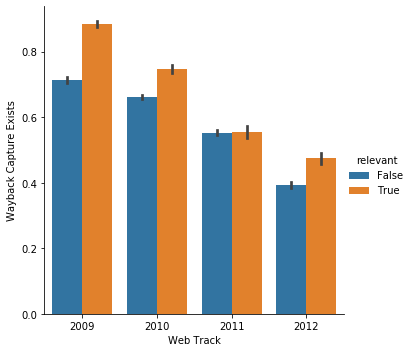

In [3]:
df_all = pd.concat([df_2009, df_2010, df_2011, df_2012])

plt_all = sb.catplot(x='corpus', y='inWayback', data=df_all, kind='bar', hue='relevant')
plt_all.set(ylabel='Wayback Capture Exists', xlabel='Web Track')

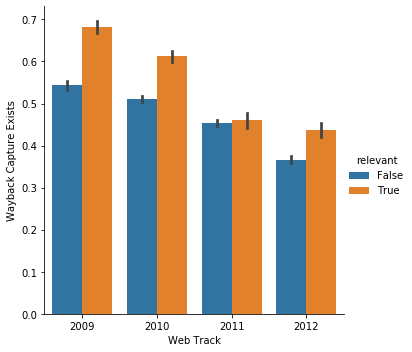

In [4]:
plt_all = sb.catplot(x='corpus', y='hasMatch', data=df_all, kind='bar', hue='relevant')
plt_all.set(ylabel='Wayback Capture Exists', xlabel='Web Track')

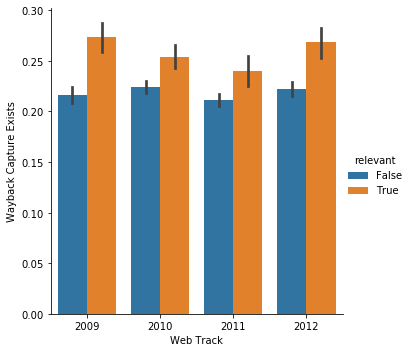

In [5]:
plt_all = sb.catplot(x='corpus', y='inCw12', data=df_all, kind='bar', hue='relevant')
plt_all.set(ylabel='Wayback Capture Exists', xlabel='Web Track')

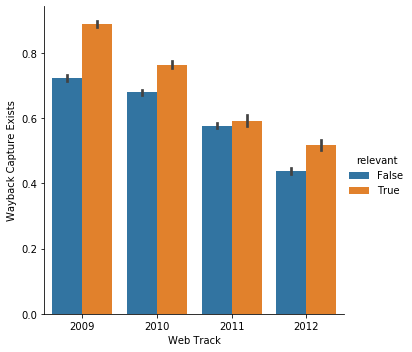

In [6]:
plt_all = sb.catplot(x='corpus', y='enrichable', data=df_all, kind='bar', hue='relevant')
plt_all.set(ylabel='Wayback Capture Exists', xlabel='Web Track')

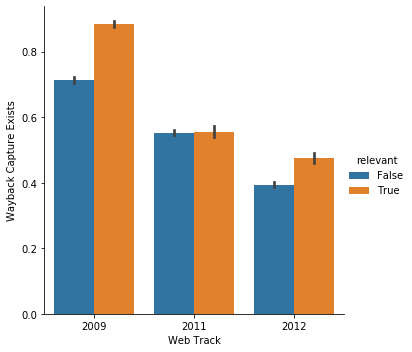

In [48]:
plt_all = sb.catplot(x='corpus', y='inWayback', data=df_all, kind='bar', hue='relevant')
plt_all.set(ylabel='Wayback Capture Exists', xlabel='Web Track')

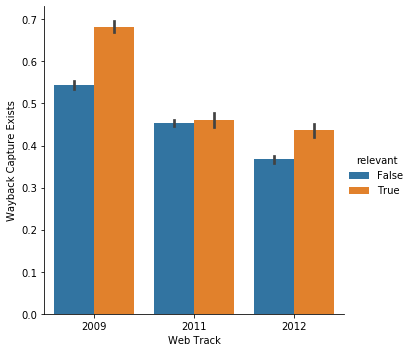

In [50]:
plt_200 = sb.catplot(x='corpus', y='hasMatch', data=df_all, kind='bar', hue='relevant')
plt_200.set(ylabel='Wayback Capture Exists', xlabel='Web Track')

# Web 2009

In [57]:
report(df_2009)['matchRatio'].describe()

count    50.000000
mean      0.580570
std       0.115495
min       0.245902
25%       0.501780
50%       0.582746
75%       0.660944
max       0.809886
Name: matchRatio, dtype: float64

In [58]:
report(df_2009)['waybackRatio'].describe()

count    50.000000
mean      0.763504
std       0.127231
min       0.426087
25%       0.685716
50%       0.793418
75%       0.871396
max       0.939297
Name: waybackRatio, dtype: float64

In [59]:
report(df_2009)['enrichableRatio'].describe()

count    50.000000
mean      0.771545
std       0.123801
min       0.469565
25%       0.695064
50%       0.799306
75%       0.876253
max       0.952077
Name: enrichableRatio, dtype: float64

# Web 2010

In [7]:
report(df_2010)['matchRatio'].describe()

count    48.000000
mean      0.532797
std       0.066733
min       0.378987
25%       0.493266
50%       0.537697
75%       0.574521
max       0.707965
Name: matchRatio, dtype: float64

In [8]:
report(df_2010)['waybackRatio'].describe()

count    48.000000
mean      0.679337
std       0.072371
min       0.458613
25%       0.629485
50%       0.698542
75%       0.728064
max       0.814159
Name: waybackRatio, dtype: float64

In [9]:
report(df_2010)['enrichableRatio'].describe()

count    48.000000
mean      0.695868
std       0.070560
min       0.483221
25%       0.650072
50%       0.710776
75%       0.745078
max       0.827506
Name: enrichableRatio, dtype: float64

# Web 2011

In [14]:
report(df_2011)['matchRatio'].describe()

count    50.000000
mean      0.452665
std       0.104097
min       0.191617
25%       0.397434
50%       0.453957
75%       0.530871
max       0.641129
Name: matchRatio, dtype: float64

In [15]:
report(df_2011)['waybackRatio'].describe()

count    50.000000
mean      0.551505
std       0.118417
min       0.212575
25%       0.489852
50%       0.562069
75%       0.651813
max       0.720874
Name: waybackRatio, dtype: float64

In [60]:
report(df_2011)['enrichableRatio'].describe()

count    50.000000
mean      0.577689
std       0.116737
min       0.236527
25%       0.516806
50%       0.587259
75%       0.671859
max       0.754032
Name: enrichableRatio, dtype: float64

# Web 2012

In [17]:
report(df_2012)['matchRatio'].describe()

count    50.000000
mean      0.380576
std       0.082594
min       0.203463
25%       0.320519
50%       0.373771
75%       0.437456
max       0.590698
Name: matchRatio, dtype: float64

In [18]:
report(df_2012)['waybackRatio'].describe()

count    50.000000
mean      0.409213
std       0.081932
min       0.251082
25%       0.344364
50%       0.399777
75%       0.465626
max       0.604651
Name: waybackRatio, dtype: float64

In [61]:
report(df_2012)['enrichableRatio'].describe()

count    50.000000
mean      0.453200
std       0.081030
min       0.287197
25%       0.391648
50%       0.456770
75%       0.513997
max       0.669767
Name: enrichableRatio, dtype: float64